In [1]:
##example notebook of pedigree generating functions + msprime ancestry simulation on pedigrees + generates figures for thesis

In [18]:
from project_lib.genotype_simulation import *
from project_lib.stat_functions import *

In [2]:
df = pedigree_init(n = 2)

In [3]:
df

,id,parent0,parent1,time
0,0,.,.,0
1,1,.,.,0


In [4]:
df = add_selective_mating(df = df, parents = (0,1), offspring = 3)

In [5]:
df

,id,parent0,parent1,time
0,0,.,.,1
1,1,.,.,1
2,2,0,1,0
3,3,0,1,0
4,4,0,1,0


In [6]:
df = add_random_mating(df, size_diff = 2, selfing_rate = 0.5)


In [7]:
df

,id,parent0,parent1,time
0,0,.,.,2
1,1,.,.,2
2,2,0,1,1
3,3,0,1,1
4,4,0,1,1
5,5,2,2,0
6,6,3,3,0
7,7,4,4,0
8,8,4,3,0
9,9,2,4,0


In [8]:
df = add_selfing(df)

In [9]:
df

,id,parent0,parent1,time
0,0,.,.,3
1,1,.,.,3
2,2,0,1,2
3,3,0,1,2
4,4,0,1,2
5,5,2,2,1
6,6,3,3,1
7,7,4,4,1
8,8,4,3,1
9,9,2,4,1


In [10]:
#turn pedigree df into tskit TreeSequence object
test_ts = df_to_ts(df, 100)

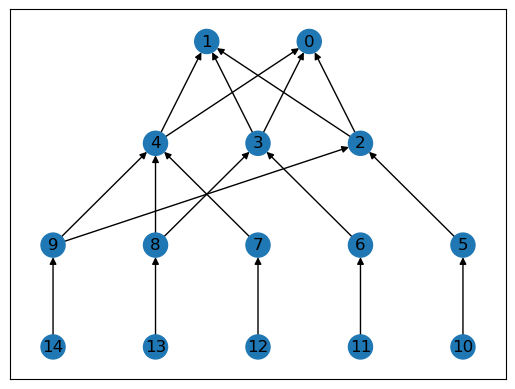

In [13]:
#draw pedigree
draw_pedigree(test_ts.tree_sequence(), out_path = "plots/ARGs etc/example_pedigree.png")

In [14]:
#simulate ancestry (ancestral recombination graph) based on pedigree with recombination parameter
arg = msprime.sim_ancestry(
    initial_state=test_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0.00025)

In [15]:
print(arg.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │ -1, -1│ {'file_id': '0'}║
║1 │    0│        │ -1, -1│ {'file_id': '1'}║
║2 │    0│        │   0, 1│ {'file_id': '2'}║
║3 │    0│        │   0, 1│ {'file_id': '3'}║
║4 │    0│        │   0, 1│ {'file_id': '4'}║
║5 │    0│        │   2, 2│ {'file_id': '5'}║
║6 │    0│        │   3, 3│ {'file_id': '6'}║
║7 │    0│        │   4, 4│ {'file_id': '7'}║
║8 │    0│        │   4, 3│ {'file_id': '8'}║
║9 │    0│        │   2, 4│ {'file_id': '9'}║
║10│    0│        │   5, 5│{'file_id': '10'}║
║11│    0│        │   6, 6│{'file_id': '11'}║
║12│    0│        │   7, 7│{'file_id': '12'}║
║13│    0│        │   8, 8│{'file_id': '13'}║
║14│    0│        │   9, 9│{'file_id': '14'}║
╚══╧═════╧════════╧═══════╧═════════════════╝

Nodes
╔══╤═════╤══════════╤═══════

In [16]:
print(arg.dump_tables().edges)

╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  100│    13│   22│        ║
║1 │   0│  100│    13│   23│        ║
║2 │   0│  100│    14│   24│        ║
║3 │   0│  100│    14│   25│        ║
║4 │   0│  100│    16│   26│        ║
║5 │   0│  100│    16│   27│        ║
║6 │   0│  100│     5│   20│        ║
║7 │  84│  100│     5│   21│        ║
║8 │   0│  100│     5│   28│        ║
║9 │   0│    4│     8│   14│        ║
║10│   0│    4│     8│   29│        ║
║11│   4│  100│     9│   14│        ║
║12│   4│  100│     9│   16│        ║
║13│   0│    4│     0│    8│        ║
║14│   0│  100│     0│   13│        ║
║15│   0│   84│     0│   21│        ║
║16│   4│  100│     0│   29│        ║
║17│   0│  100│     3│    5│        ║
║18│   4│  100│     3│    9│        ║
║19│   0│    4│     3│   16│        ║
╚══╧════╧═════╧══════╧═════╧════════╝



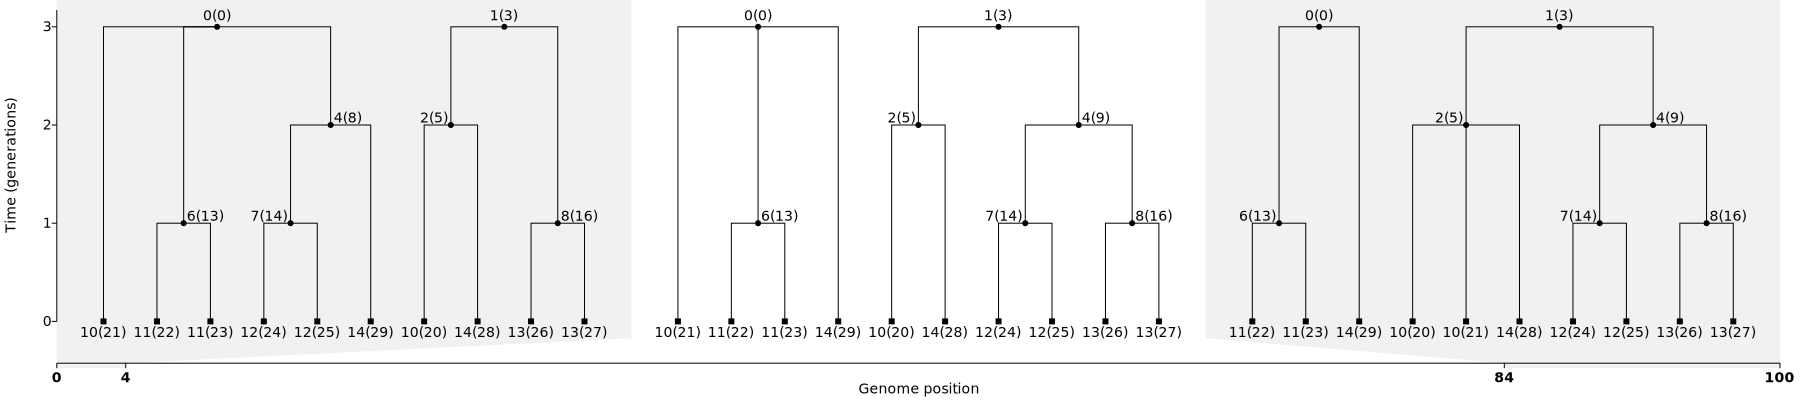

In [17]:
#draw ARG
draw_ancestry(arg, x_size = 1800, out_path = "plots/ARGs etc/example_ARG.svg")

In [16]:
#simulate ARG with 0 recombination rate
arg_norec = msprime.sim_ancestry(
    initial_state=test_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0)

In [17]:
print(arg_norec.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │ -1, -1│ {'file_id': '0'}║
║1 │    0│        │ -1, -1│ {'file_id': '1'}║
║2 │    0│        │   0, 1│ {'file_id': '2'}║
║3 │    0│        │   0, 1│ {'file_id': '3'}║
║4 │    0│        │   0, 1│ {'file_id': '4'}║
║5 │    0│        │   2, 2│ {'file_id': '5'}║
║6 │    0│        │   3, 3│ {'file_id': '6'}║
║7 │    0│        │   4, 4│ {'file_id': '7'}║
║8 │    0│        │   2, 3│ {'file_id': '8'}║
║9 │    0│        │   3, 3│ {'file_id': '9'}║
║10│    0│        │   5, 5│{'file_id': '10'}║
║11│    0│        │   6, 6│{'file_id': '11'}║
║12│    0│        │   7, 7│{'file_id': '12'}║
║13│    0│        │   8, 8│{'file_id': '13'}║
║14│    0│        │   9, 9│{'file_id': '14'}║
╚══╧═════╧════════╧═══════╧═════════════════╝

Nodes
╔══╤═════╤══════════╤═══════

In [18]:
print(arg_norec.dump_tables().edges)

╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  100│    15│   24│        ║
║1 │   0│  100│    15│   25│        ║
║2 │   0│  100│    17│   26│        ║
║3 │   0│  100│    17│   27│        ║
║4 │   0│  100│    18│   28│        ║
║5 │   0│  100│    18│   29│        ║
║6 │   0│  100│     4│   20│        ║
║7 │   0│  100│     4│   21│        ║
║8 │   0│  100│     6│   17│        ║
║9 │   0│  100│     6│   22│        ║
║10│   0│  100│     6│   23│        ║
║11│   0│  100│     0│    4│        ║
║12│   0│  100│     1│    6│        ║
║13│   0│  100│     2│   15│        ║
║14│   0│  100│     3│   18│        ║
╚══╧════╧═════╧══════╧═════╧════════╝



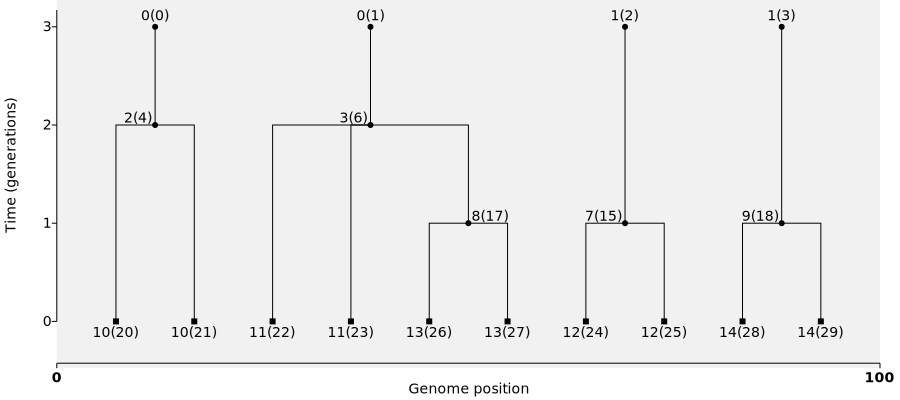

In [19]:
#draw ARG
draw_ancestry(arg_norec, x_size = 900)

In [42]:
df_intro = pedigree_init(n = 2)

In [43]:
df_intro = add_random_mating(df_intro, selfing_rate = 0.5, size_diff = 1)
df_intro = add_selfing(df_intro)

In [44]:
df_intro

,id,parent0,parent1,time
0,0,.,.,2
1,1,.,.,2
2,2,0,0,1
3,3,1,1,1
4,4,1,0,1
5,5,2,2,0
6,6,3,3,0
7,7,4,4,0


In [45]:
#turn pedigree df into tskit TreeSequence object
intro_ts = df_to_ts(df_intro, 100)

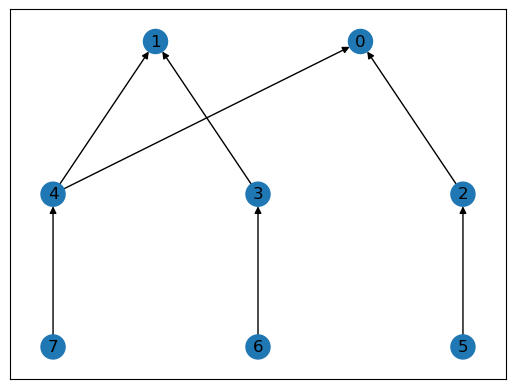

In [46]:
#draw pedigree
draw_pedigree(intro_ts.tree_sequence(), out_path = "plots/ARGs etc/intro_pedigree.png")

In [47]:
#simulate ancestry (ancestral recombination graph) based on pedigree with recombination parameter
intro_arg = msprime.sim_ancestry(
    initial_state=intro_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0.001)

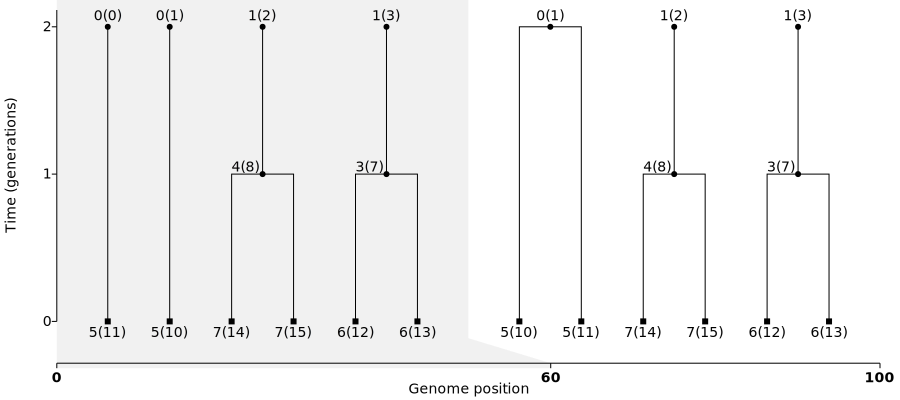

In [48]:
#draw ARG
draw_ancestry(intro_arg, x_size = 900, out_path = "plots/ARGs etc/intro_ARG.svg")

In [91]:
print(intro_arg.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤════════════════╗
║id│flags│location│parents│metadata        ║
╠══╪═════╪════════╪═══════╪════════════════╣
║0 │    0│        │ -1, -1│{'file_id': '0'}║
║1 │    0│        │ -1, -1│{'file_id': '1'}║
║2 │    0│        │   0, 0│{'file_id': '2'}║
║3 │    0│        │   1, 1│{'file_id': '3'}║
║4 │    0│        │   0, 1│{'file_id': '4'}║
║5 │    0│        │   2, 2│{'file_id': '5'}║
║6 │    0│        │   3, 3│{'file_id': '6'}║
║7 │    0│        │   4, 4│{'file_id': '7'}║
╚══╧═════╧════════╧═══════╧════════════════╝

Nodes
╔══╤═════╤══════════╤══════════╤════╤════════╗
║id│flags│population│individual│time│metadata║
╠══╪═════╪══════════╪══════════╪════╪════════╣
║0 │    0│         0│         0│   2│        ║
║1 │    0│         0│         0│   2│        ║
║2 │    0│         0│         1│   2│        ║
║3 │    0│         0│         1│   2│        ║
║4 │    0│         0│         2│ 